<a href="https://colab.research.google.com/github/baur-mukhamet/shakespeare-gpt2/blob/main/run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/gpt_from_scratch

Mounted at /content/drive
/content/drive/MyDrive/gpt_from_scratch


In [3]:
from utils import plot_losses

# Character-level language model

**First we train simple, next character prediction, models**

In [ ]:
%run run.py \
--'chrs' \
--batch_size 32 \
--block_size 128 \
--num_epochs 100 \
--learning_rates 1e-3 \
--weight_decays 1\
--dropouts 0.2 \
--save_losses \
--save_checkpoint \
--run_dir "./cosine_schedule" \
--lr_schedule 'cosine' \
--cosine_final_lr 1e-8 \
--cosine_T_max 100 \

**With constant learning rate the best run is**

Best eval loss:  1.4795666805335455
Best checkpoint: 207754
{'num_epochs': 50, 'batch_size': 32, 'eval_steps': 2000, 'learning_rate': 0.001, 'weight_decay': 1.0}
{'vocab_size': 65, 'n_blocks': 6, 'n_emb': 384, 'n_heads': 6, 'block_size': 128, 'dropout': 0.1}


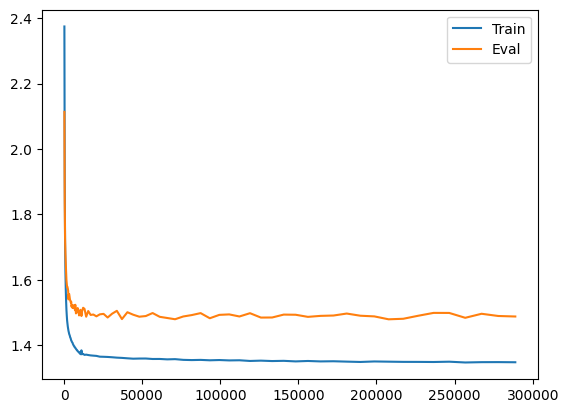

In [ ]:
plot_losses('./best_trained_models/chrs/const_lr')

**With cosine learning rate schedule the best run is**

Best eval loss:  1.460944311959403
Best checkpoint: 15042
{'num_epochs': 100, 'batch_size': 32, 'eval_steps': 2000, 'learning_rate': 0.001, 'weight_decay': 1.0}
{'vocab_size': 65, 'n_blocks': 6, 'n_emb': 384, 'n_heads': 6, 'block_size': 128, 'dropout': 0.2}


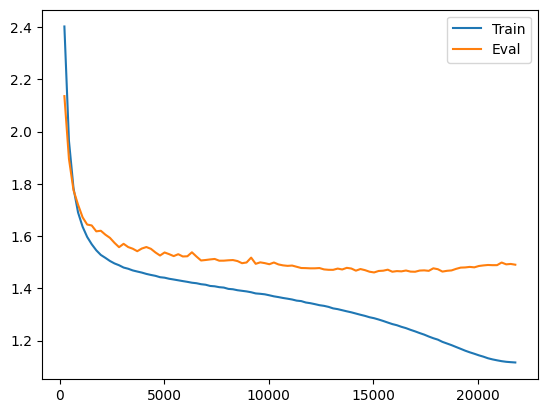

In [ ]:
plot_losses('./best_trained_models/chrs/cos_lr')

In [ ]:
%run generate.py './best_trained_models/chrs/cos_lr' \
--checkpoint_step 68 \
--max_new_tokens 2000

  0%|          | 0/2000 [00:00<?, ?it/s]



KING RICHARD II:
What say you? in Citizen? why, ho! no; and thou that?
Wrank my baot, what you alone bitcher.

KING RICHARD III:
Well, she now lies my discourse; what I should dismempt
Upon of your right, to note makes have conceit tongue
With with all alls my father's king; for seem me
contriment: what else were we coffer'd to repent,
And, mine own whom I dost shall weep thee.

BUCKINGHAM:
I will say her mouth be from high from life.

KING HENRY VI:
I not know, this is not uncle thought,
Three, the prince, Warwick, and the present;
You shall give a certain's far in.

Second Murderer:
Ay, in Waft stays, candal, Bolingbroke.

GLOUCESTER:
Prevure me, pardon! what sheften? he shall and their champion
gracious bs you woes burne
And part the masks for frae royal brother.
To we hear miserable young Tybalt,' this you are
babeTraganity, that banished these men than years
She is nothing; traitors, lest dream disposing
Of yoppression. Your prisoners of you are well
monging for thund authority


<Figure size 640x480 with 0 Axes>

In [ ]:
%run generate.py './best_trained_models/chrs/const_lr' \
--checkpoint_step 42 \
--max_new_tokens 2000

  0%|          | 0/2000 [00:00<?, ?it/s]



KING RICHARd:
And, garlore, as not what measure may thee protector
To purp
Who is thy flouries with your banishments.

GLOUCESTER:
This is't so, how done,
Are you prophetes
Strange our ends is surely?

Less:
Peace bortune of sovereign.
How father!

POMPEY:

POMPEY:
No less, and that Master.

LADY LRET:
What sit!

POWIS:
Do now, look to see them to tell you:
I to-day now think thou, sir, by the great sdift.

LADY ANNE:
Why, is in their royal overs' princess?

LADY ANNE:
See, do you have, my lads?

DUCHESS OF ELHAcD:
As I rich maddless too true.

DUCHEY:
I will posses rave memor:

KING RICHARD II:
Slandess are belue on is at breast
To dear those deadly precious coulds.

KING RICHARET:
You last, and, who, that you do not uncleaned in
Their desolanuse; 'tis name, Clifford.

KING RIVERS:
What cheern I these one? but their tree,
Accursared'st and creatures of Lewis captly?

KING EDWARD IV:
So since I; but, 'tis royalf had breauge,
And I nor hadst a reputement.

PRINCE:
Warwick, Rieen, bUCK

# Byte-Pair Encoding tokenizer

**Now we train with a more sophisticated tokenizer, taken from Andrey Karpathy's reimplementation of OpenAI tokenzier [minGPT](https://github.com/karpathy/minGPT/tree/master)**

In [ ]:
%run run.py \
--tokenizer_type 'bpe' \
--batch_sizes 32 \
--block_sizes 128 \
--num_epochs 100 \
--learning_rates 1e-4 \
--weight_decays 3 \
--dropouts 0.2 \
--save_losses \
--save_checkpoint \
--run_dir "./long_run_cos_lr1e-4" \
--lr_schedule 'cosine' \
--cosine_final_lr 1e-8 \
--cosine_T_max 100


Experiment 1/1: 
block_size=128 
batch_size= 32 
lr=1e-04 
weight_decay=3e+00
dropout=2e-01
final_lr=1e-08
T_max=100
T_mult=  1
lr_restart_decay=1e+00


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:    1/100 || Train loss: 8.3445 || Eval loss: 6.9198 || lr: 1.0000e-04


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:    2/100 || Train loss: 6.4395 || Eval loss: 6.1839 || lr: 9.9975e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:    3/100 || Train loss: 6.0361 || Eval loss: 5.9688 || lr: 9.9901e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:    4/100 || Train loss: 5.8197 || Eval loss: 5.7561 || lr: 9.9778e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:    5/100 || Train loss: 5.5924 || Eval loss: 5.5426 || lr: 9.9606e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:    6/100 || Train loss: 5.3957 || Eval loss: 5.3859 || lr: 9.9384e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:    7/100 || Train loss: 5.2424 || Eval loss: 5.2706 || lr: 9.9114e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:    8/100 || Train loss: 5.1200 || Eval loss: 5.1901 || lr: 9.8796e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:    9/100 || Train loss: 5.0195 || Eval loss: 5.1414 || lr: 9.8429e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   10/100 || Train loss: 4.9380 || Eval loss: 5.0374 || lr: 9.8015e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   11/100 || Train loss: 4.8673 || Eval loss: 5.0140 || lr: 9.7553e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   12/100 || Train loss: 4.8071 || Eval loss: 4.9785 || lr: 9.7044e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   13/100 || Train loss: 4.7535 || Eval loss: 4.9255 || lr: 9.6489e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   14/100 || Train loss: 4.7063 || Eval loss: 4.9001 || lr: 9.5888e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   15/100 || Train loss: 4.6661 || Eval loss: 4.8592 || lr: 9.5242e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   16/100 || Train loss: 4.6266 || Eval loss: 4.8490 || lr: 9.4551e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   17/100 || Train loss: 4.5911 || Eval loss: 4.8567 || lr: 9.3816e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   18/100 || Train loss: 4.5587 || Eval loss: 4.8373 || lr: 9.3038e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   19/100 || Train loss: 4.5264 || Eval loss: 4.8000 || lr: 9.2217e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   20/100 || Train loss: 4.4974 || Eval loss: 4.7988 || lr: 9.1355e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   21/100 || Train loss: 4.4710 || Eval loss: 4.7897 || lr: 9.0452e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   22/100 || Train loss: 4.4445 || Eval loss: 4.7330 || lr: 8.9509e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   23/100 || Train loss: 4.4186 || Eval loss: 4.7420 || lr: 8.8527e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   24/100 || Train loss: 4.3974 || Eval loss: 4.7199 || lr: 8.7507e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   25/100 || Train loss: 4.3765 || Eval loss: 4.7367 || lr: 8.6450e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   26/100 || Train loss: 4.3565 || Eval loss: 4.7191 || lr: 8.5357e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   27/100 || Train loss: 4.3396 || Eval loss: 4.7221 || lr: 8.4229e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   28/100 || Train loss: 4.3217 || Eval loss: 4.6864 || lr: 8.3067e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   29/100 || Train loss: 4.3054 || Eval loss: 4.6902 || lr: 8.1873e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   30/100 || Train loss: 4.2910 || Eval loss: 4.6621 || lr: 8.0647e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   31/100 || Train loss: 4.2752 || Eval loss: 4.6785 || lr: 7.9391e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   32/100 || Train loss: 4.2631 || Eval loss: 4.6570 || lr: 7.8106e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   33/100 || Train loss: 4.2483 || Eval loss: 4.6429 || lr: 7.6794e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   34/100 || Train loss: 4.2372 || Eval loss: 4.6548 || lr: 7.5455e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   35/100 || Train loss: 4.2258 || Eval loss: 4.6441 || lr: 7.4090e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   36/100 || Train loss: 4.2157 || Eval loss: 4.6574 || lr: 7.2702e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   37/100 || Train loss: 4.2047 || Eval loss: 4.6281 || lr: 7.1292e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   38/100 || Train loss: 4.1957 || Eval loss: 4.6175 || lr: 6.9860e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   39/100 || Train loss: 4.1871 || Eval loss: 4.6218 || lr: 6.8409e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   40/100 || Train loss: 4.1773 || Eval loss: 4.5984 || lr: 6.6940e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   41/100 || Train loss: 4.1686 || Eval loss: 4.6436 || lr: 6.5454e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   42/100 || Train loss: 4.1599 || Eval loss: 4.6334 || lr: 6.3953e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   43/100 || Train loss: 4.1517 || Eval loss: 4.5937 || lr: 6.2438e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   44/100 || Train loss: 4.1458 || Eval loss: 4.6051 || lr: 6.0911e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   45/100 || Train loss: 4.1371 || Eval loss: 4.6385 || lr: 5.9373e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   46/100 || Train loss: 4.1313 || Eval loss: 4.6366 || lr: 5.7826e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   47/100 || Train loss: 4.1235 || Eval loss: 4.6053 || lr: 5.6271e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   48/100 || Train loss: 4.1172 || Eval loss: 4.5982 || lr: 5.4710e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   49/100 || Train loss: 4.1117 || Eval loss: 4.6213 || lr: 5.3144e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   50/100 || Train loss: 4.1047 || Eval loss: 4.5723 || lr: 5.1575e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   51/100 || Train loss: 4.1008 || Eval loss: 4.6075 || lr: 5.0005e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   52/100 || Train loss: 4.0959 || Eval loss: 4.5449 || lr: 4.8435e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   53/100 || Train loss: 4.0908 || Eval loss: 4.5773 || lr: 4.6866e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   54/100 || Train loss: 4.0855 || Eval loss: 4.5654 || lr: 4.5300e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   55/100 || Train loss: 4.0803 || Eval loss: 4.6041 || lr: 4.3739e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   56/100 || Train loss: 4.0735 || Eval loss: 4.5907 || lr: 4.2184e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   57/100 || Train loss: 4.0716 || Eval loss: 4.5802 || lr: 4.0637e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   58/100 || Train loss: 4.0660 || Eval loss: 4.5830 || lr: 3.9099e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   59/100 || Train loss: 4.0609 || Eval loss: 4.5550 || lr: 3.7572e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   60/100 || Train loss: 4.0581 || Eval loss: 4.6016 || lr: 3.6057e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   61/100 || Train loss: 4.0551 || Eval loss: 4.5784 || lr: 3.4556e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   62/100 || Train loss: 4.0497 || Eval loss: 4.5593 || lr: 3.3070e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   63/100 || Train loss: 4.0467 || Eval loss: 4.5561 || lr: 3.1601e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   64/100 || Train loss: 4.0430 || Eval loss: 4.5827 || lr: 3.0150e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   65/100 || Train loss: 4.0395 || Eval loss: 4.5565 || lr: 2.8718e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   66/100 || Train loss: 4.0368 || Eval loss: 4.5579 || lr: 2.7308e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   67/100 || Train loss: 4.0332 || Eval loss: 4.5569 || lr: 2.5920e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   68/100 || Train loss: 4.0306 || Eval loss: 4.5605 || lr: 2.4555e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   69/100 || Train loss: 4.0277 || Eval loss: 4.5596 || lr: 2.3216e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   70/100 || Train loss: 4.0249 || Eval loss: 4.5879 || lr: 2.1904e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   71/100 || Train loss: 4.0222 || Eval loss: 4.5903 || lr: 2.0619e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   72/100 || Train loss: 4.0187 || Eval loss: 4.5651 || lr: 1.9363e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   73/100 || Train loss: 4.0170 || Eval loss: 4.5579 || lr: 1.8137e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   74/100 || Train loss: 4.0160 || Eval loss: 4.5703 || lr: 1.6943e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   75/100 || Train loss: 4.0127 || Eval loss: 4.5732 || lr: 1.5781e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   76/100 || Train loss: 4.0105 || Eval loss: 4.5684 || lr: 1.4653e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   77/100 || Train loss: 4.0087 || Eval loss: 4.5235 || lr: 1.3560e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   78/100 || Train loss: 4.0085 || Eval loss: 4.5764 || lr: 1.2503e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   79/100 || Train loss: 4.0057 || Eval loss: 4.5655 || lr: 1.1483e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   80/100 || Train loss: 4.0033 || Eval loss: 4.5703 || lr: 1.0501e-05


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   81/100 || Train loss: 4.0025 || Eval loss: 4.5537 || lr: 9.5582e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   82/100 || Train loss: 4.0003 || Eval loss: 4.5628 || lr: 8.6551e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   83/100 || Train loss: 3.9994 || Eval loss: 4.5298 || lr: 7.7928e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   84/100 || Train loss: 3.9973 || Eval loss: 4.5813 || lr: 6.9722e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   85/100 || Train loss: 3.9963 || Eval loss: 4.5779 || lr: 6.1940e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   86/100 || Train loss: 3.9941 || Eval loss: 4.5734 || lr: 5.4591e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   87/100 || Train loss: 3.9947 || Eval loss: 4.5849 || lr: 4.7682e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   88/100 || Train loss: 3.9933 || Eval loss: 4.5899 || lr: 4.1219e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   89/100 || Train loss: 3.9921 || Eval loss: 4.5851 || lr: 3.5208e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   90/100 || Train loss: 3.9915 || Eval loss: 4.5727 || lr: 2.9657e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   91/100 || Train loss: 3.9916 || Eval loss: 4.5410 || lr: 2.4569e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   92/100 || Train loss: 3.9897 || Eval loss: 4.5613 || lr: 1.9951e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   93/100 || Train loss: 3.9895 || Eval loss: 4.5956 || lr: 1.5807e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   94/100 || Train loss: 3.9889 || Eval loss: 4.5948 || lr: 1.2140e-06


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   95/100 || Train loss: 3.9881 || Eval loss: 4.5337 || lr: 8.9555e-07


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   96/100 || Train loss: 3.9891 || Eval loss: 4.5738 || lr: 6.2552e-07


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   97/100 || Train loss: 3.9878 || Eval loss: 4.5769 || lr: 4.0423e-07


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   98/100 || Train loss: 3.9874 || Eval loss: 4.5760 || lr: 2.3188e-07


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   99/100 || Train loss: 3.9884 || Eval loss: 4.5502 || lr: 1.0865e-07


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:  100/100 || Train loss: 3.9884 || Eval loss: 4.5631 || lr: 3.4670e-08


Best eval loss:  4.365200254652235
Best checkpoint: 94
{'num_epochs': 100, 'batch_size': 32, 'learning_rate': 0.0001, 'weight_decay': 3.0}
{'vocab_size': 50257, 'n_blocks': 6, 'n_emb': 384, 'n_heads': 6, 'block_size': 128, 'dropout': 0.2}


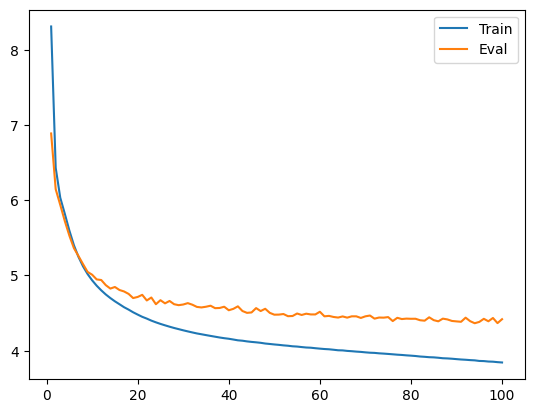

In [4]:
plot_losses("./best_trained_models/bpe/const_lr")

Best eval loss:  3.5625376171535916
Best checkpoint: 304
{'num_epochs': 100, 'batch_size': 32, 'learning_rate': 5e-06, 'weight_decay': 3.0}
{'vocab_size': 50257, 'n_blocks': 6, 'n_emb': 384, 'n_heads': 6, 'block_size': 128, 'dropout': 0.2}


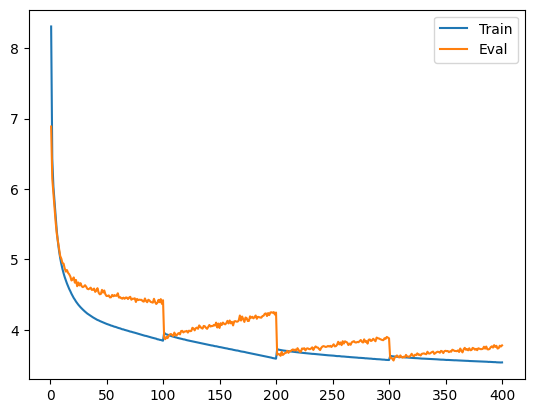

In [5]:
plot_losses("./best_trained_models/bpe/lr_step_decay")

In [7]:
%run generate.py "./best_trained_models/bpe/lr_step_decay" \
--tokenizer_type 'bpe' \
--checkpoint_step 304 \
--max_new_tokens 500

  0%|          | 0/500 [00:00<?, ?it/s]

!
We was dared to his father, but, report
Your all any great death: I have eve.

CALUS:
It was at the king, 'twere now, for this;
It sends she: eat what's, to heaven,--
Come, sir,Need boast his weeds oftenBR
3 KING sore distribution, lend him

MEN highumentle
Thus his five men,
We shall follow him.
ThirdBeing nor;

CORIUS:
Nightless soil, are too now we depsal robbers into
Betw got in charity; for they shall of
the home: woodency, and yet he is it hence,
You never sh E miscar councils, to be most one thing,

To answer the traitors and unhappy, rel withheld.

First wealsdigy,
We, Marcius the Lord:
'ld never lacks truth that nothing of the memory,
His inherunes answer'd by the present sight o' the
Of the coronible: believe, here, that
Which we do eyedoser, but had esteemfully,
Our which weeps by his impartial sides priixt his
Upon my kindred years to a woman's model of saw,
Groyet fear not winter love;BIANDA:
Sweet nurse, by you have,
Or courOf then, their garments, meets far have soarse